In [1]:
# importing libraries

import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DataSets/corn-yield.csv')
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"245,000",NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"36,015,000",NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"9,000",NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"34,000",NaN


In [3]:
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

### Data inspection


In [4]:
df.describe()

,Year,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,CV (%)
count,23474.000000,0.0,23440.000000,0.0,0.0,0.0,0.0,0.0,0.0,23474.0,0.0,0.0
mean,1954.280907,NaN,30.023379,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,40.371092,NaN,15.388973,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,1866.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,1925.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,1956.000000,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,1989.000000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
max,2015.000000,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           23474 non-null  object 
 1   Year              23474 non-null  int64  
 2   Period            23474 non-null  object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         23474 non-null  object 
 5   State             23474 non-null  object 
 6   State ANSI        23440 non-null  float64
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    23474 non-null  int64  
 14  Watershed         0 non-null      float64
 15  Commodity         23474 non-null  object 
 16  Data Item         23474 non-null  object

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    

SURVEY    23474
Name: Program, dtype: int64
2015    496
2012    483
2014    483
2013    376
1935    192
       ... 
1877     72
1878     72
1868     70
1867     70
1866     70
Name: Year, Length: 150, dtype: int64
YEAR                   22352
YEAR - AUG FORECAST      264
YEAR - NOV FORECAST      264
YEAR - SEP FORECAST      264
YEAR - OCT FORECAST      207
YEAR - JUN FORECAST      123
Name: Period, dtype: int64
Series([], Name: Week Ending, dtype: int64)
STATE    23474
Name: Geo Level, dtype: int64
ALABAMA           527
MARYLAND          527
WISCONSIN         527
VIRGINIA          527
TEXAS             527
TENNESSEE         527
SOUTH CAROLINA    527
PENNSYLVANIA      527
OHIO              527
NORTH CAROLINA    527
NEW YORK          527
NEW JERSEY        527
MISSOURI          527
MISSISSIPPI       527
MINNESOTA         527
MICHIGAN          527
NEBRASKA          527
INDIANA           527
LOUISIANA         527
KENTUCKY          527
KANSAS            527
IOWA              527
ARKANSAS    

## Data preprocessing

In [7]:
cols_to_be_removed = ["Program","Week Ending","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","Watershed","CV (%)","Domain Category","Commodity","Geo Level","watershed_code","Domain"]
df.drop(columns=cols_to_be_removed,axis = 1,inplace=True)


In [8]:
# Check null values
df.isna().sum()

Year           0
Period         0
State          0
State ANSI    34
Data Item      0
Value          0
dtype: int64

In [9]:
# Filling missing values
df["State ANSI"].fillna(0,inplace=True)

# Re-Check null values
df.isnull().sum()

Year          0
Period        0
State         0
State ANSI    0
Data Item     0
Value         0
dtype: int64

In [10]:
df.columns

Index(['Year', 'Period', 'State', 'State ANSI', 'Data Item', 'Value'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        23474 non-null  int64  
 1   Period      23474 non-null  object 
 2   State       23474 non-null  object 
 3   State ANSI  23474 non-null  float64
 4   Data Item   23474 non-null  object 
 5   Value       23474 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [12]:
df['Value'].value_counts()

3,000         228
10            206
15            194
2,000         179
10,000        172
             ... 
1,533,000       1
3,763,000       1
30,752,000      1
496,000         1
14,250,000      1
Name: Value, Length: 7145, dtype: int64

In [13]:
df["Value"] = df["Value"].str.replace(',','')
df['Value'].value_counts()
df["Value"] = df["Value"].astype("float")

In [14]:
df["State ANSI"] = df["State ANSI"].astype("int")


In [15]:
df.head()

,Year,Period,State,State ANSI,Data Item,Value
0,2015,YEAR,ALABAMA,1,"CORN, GRAIN - ACRES HARVESTED",245000.0
1,2015,YEAR,ALABAMA,1,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",36015000.0
2,2015,YEAR,ALABAMA,1,"CORN, SILAGE - ACRES HARVESTED",9000.0
3,2015,YEAR,ALABAMA,1,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",15.0
4,2015,YEAR,ARIZONA,4,"CORN, GRAIN - ACRES HARVESTED",34000.0


In [16]:
#Covert the data in appropriate data
def one_hot_encoding(df,column):
    one_hot_encoder=ce.OneHotEncoder(cols=column,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [17]:
df = one_hot_encoding(df,"Period")
df = one_hot_encoding(df,"Data Item")
df = one_hot_encoding(df,"State")

In [18]:
df.head()

,Year,Period_YEAR,Period_YEAR - AUG FORECAST,Period_YEAR - JUN FORECAST,Period_YEAR - NOV FORECAST,Period_YEAR - OCT FORECAST,Period_YEAR - SEP FORECAST,State_ALABAMA,State_ARIZONA,State_ARKANSAS,...,State_WASHINGTON,State_WEST VIRGINIA,State_WISCONSIN,State_WYOMING,State ANSI,"Data Item_CORN, GRAIN - ACRES HARVESTED","Data Item_CORN, GRAIN - PRODUCTION, MEASURED IN BU","Data Item_CORN, SILAGE - ACRES HARVESTED","Data Item_CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",Value
0,2015,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,245000.0
1,2015,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,36015000.0
2,2015,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,9000.0
3,2015,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,15.0
4,2015,1,0,0,0,0,0,0,1,0,...,0,0,0,0,4,1,0,0,0,34000.0


In [19]:
X = df.drop("Value",axis = 1)
Y = df["Value"]

In [20]:
# Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

In [21]:
train,test = train_test_split(df, test_size=0.25,random_state= 27)


# Training Models

## RandomForestRegressor

In [22]:
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_reg.fit(X_train, Y_train)
Y_pred = random_reg.predict(X_test)

####  Evaluation Metrics

In [23]:
mse = mean_squared_error(Y_pred,Y_test)
mse

776880642843646.2

In [24]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

4932323.292541001

In [25]:
r2_score = random_reg.score(X_test,Y_test)
r2_score

0.9735367065373357

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

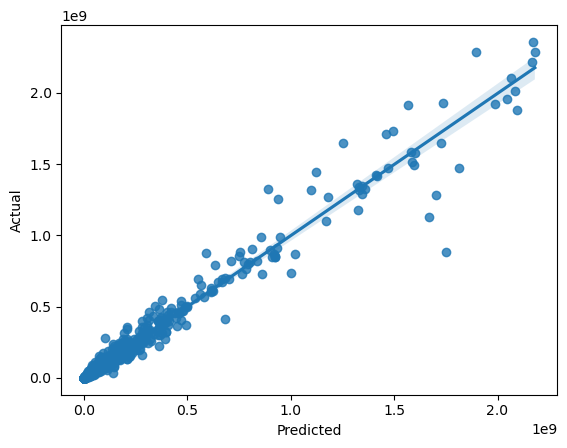

In [26]:
plot = sns.regplot(Y_pred,Y_test)
plot.set(xlabel="Predicted",ylabel = "Actual")

### Insights
 The R2 value between predicted and actual values shows a strong positive correlation

## Decision Tree Regressor

In [27]:
decision_reg = DecisionTreeRegressor(random_state = 0)
decision_reg.fit(X_train, Y_train)
Y_pred = decision_reg.predict(X_test)

####  Evaluation Metrics

In [28]:
mse = mean_squared_error(Y_pred,Y_test)
mse

1165779654946752.8

In [29]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

5844223.27772098

In [30]:

r2_score = decision_reg.score(X_test,Y_test)
r2_score

0.960289435184359

# K- Nearest Neighbors Regressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor
neighbors_reg = KNeighborsRegressor()
neighbors_reg.fit(X_train, Y_train)
Y_pred = neighbors_reg.predict(X_test)

####  Evaluation Metrics

In [32]:
mse = mean_squared_error(Y_pred,Y_test)
mse

1.2043881544633224e+16

In [33]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

37318241.428643234

In [34]:
r2_score = neighbors_reg.score(X_test,Y_test)
r2_score

0.5897429358278647